# Recommended Stack Up - 4 Layers
1. Top (Signal and Components):
    - High-speed signals - SPI, UART, USB
    - Components - Microcontroller (ESP32), USB-to-UART bridge, display connector, buttons, joysticks
    - USB signals are high speed, and should not switch layers unnevessarily
        - Route D+ and D- as a differential pair (90Ω impedance, depending on your PCB material and thickness).
        - Keep USB traces short and away from noise sources (like switching regulators).
    - SPI signals should have minimal vias to reduce signal reflections
    - pushbuttons are slow, so they don't introduce much noise


2. Layer 2 (GND Plane)
    - Provides low-impedance return paths for all signals, especially high speed ones (USB, SPI)
    - reduces EMI and crosstalk
    - provides a stable reference plane for your analog joystick signals (accuaracy is important)
    - prevents ground loops
    - **** if possible, ensure USB D+ and D- signals always have a ground plane directly below them

3. Layer 3 (Power Plane)
    - seperate region for different voltage domains
    - ensures stable power delivery to all components, minimizing voltage drops and noise
    - 9V, 3.3V, and 3V power rails
    - Separate regions for different voltage domains
    - Don't need a dedicated 5V partition as it will only be used for testing/programming, not for "regular operation

4. Bottom Layer (Signal & Miscellaneous Routing)
    - Primarily Analog joystick signals, some digital control lines and some low speed speed signals
    - analog joysticks signals should have minimal interference
    - pushbutton digital signal is slow and low priority
    - helps prevent congestion on the top layer



# Why this stackup
- **Improved Signal Integrity**: Placing a solid GND plane (Layer 2) beneath the signal layer ensures strong return paths, minimizing interference and noise.
- **Better Power Distribution**: A dedicated power plane (Layer 3) helps reduce I*R drops and improves power stability for ESP32 and display
- **Minimize EMI Issues**: keeping high speed signals on the top layer with ground reference below reduces emmsions
- **Efficient routing for Analog and digital signals**: the bottom layer is used for joystick analog signals and low speed control lines to avoid inerfernce with SPI and UART

## Key considerations
1. USB Traces
    - route as a differential pair with controlled impedance (90 ohms)
    - avoid vias if possible (switching layers can cause signal reflections)
    - keep short and way from power traces
2. SPI Signals
    - keep short and direct to avoid reflections
    - referenc GND plane to maintain signal integrity
3. Analog joystick signals
    - route away from high speed traces
    - avoid long traces that could pick up noise
    - ensure a solid ground reference
4. Power Traces
    - no 5V section in power plane
    - Wide traces for high-current paths

## Deeper Analog investigation
- Why bottom layer
    - Routing them on the bottom layer minimizes interference from digital noise from high speed traces
    - if placed on top layer, may be too close to noisy high speed components
- Conditions to follow
    - avoid running the in parallel to high-speed signals to minimize capacitive coupling
    - ensur they have a clear return path in the GND plane
    - if an analog signal has to switch layers, place a GND via near the via to mainaint a continous return path

# Why Use a Signal-GND-PWR-Signal Stack-Up Instead of Signal-GND-GND-Signal?
- A Signal-GND-PWR-Signal stack-up is better for power integrity and signal return paths.
- using response from Grok

1. Power Distribution and Stability
    - Signal-GND-PWR-Signal Stack-Up:
        - Having a dedicated power plane (PWR) in Layer 3 provides a low-impedance, stable voltage reference for all components 
        - The power plane allows for efficient power distribution with minimal voltage drops and noise, especially important for the power-hungry ESP32 and the analog signals from the joysticks, which require clean, stable power to avoid noise-induced errors.
    - Signal-GND-GND-Signal Stack-Up:
        - With two ground planes but no dedicated power plane, you’d need to route power traces on the signal layers (top and bottom). 
        - This can lead to higher impedance paths for power delivery, increasing the risk of voltage drops, noise, and ground bounce 
        - Routing power on signal layers could also increase the likelihood of crosstalk and EMI, as power traces might run parallel to sensitive analog or digital signals.
- For your battery-powered, hand-held device with multiple voltage domains and mixed-signal requirements, a dedicated power plane offers better performance and simplifies design.

2. Noise Isolation and EMI/EMC
    - Signal-GND-PWR-Signal Stack-Up:
        - The ground plane (Layer 2) acts as a shield between the top signal layer and the power plane (Layer 3), reducing noise coupling between signals and power distribution.
        - The ground plane also provides a low-impedance return path for all signals, minimizing ground bounce and EMI
        - The power plane, isolated by the ground plane, further reduces noise coupling to the bottom signal layer, maintaining signal integrity for the display, motion control, and state control signals.
    - Signal-GND-GND-Signal Stack-Up:
        - Two ground planes can provide excellent shielding for signals on the outer layers, but without a dedicated power plane, power distribution noise (e.g., from switching regulators like the buck converter or LDO) can couple into the signal layers more easily.
        - The lack of a power plane means you’d need to route power traces on the signal layers, potentially increasing EMI and crosstalk 
- Your design’s mixed-signal nature (analog joysticks, digital pushbuttons, SPI communication, and Bluetooth) benefits from the noise isolation provided by separating power and ground with a dedicated plane in the Signal-GND-PWR-Signal stack-up.




# General Layout Strategy
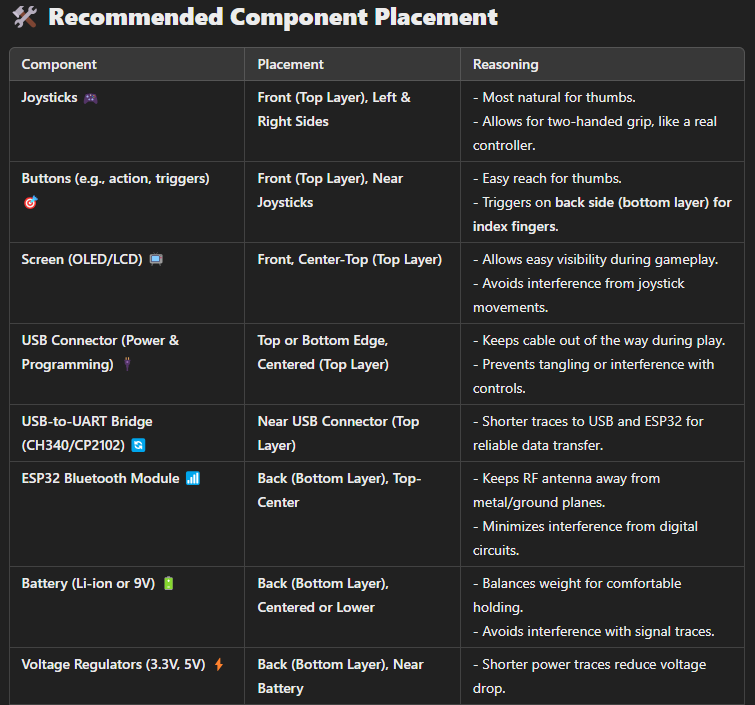

- Top Layer: Primary placement for interactive components
- Bottom Layer: Heavy and laerge components
- Joysticks & Buttons: Use low-noise analog routing techniques to avoid picking up digital noise.
- USB Data (D+/D-) & UART: Short, direct traces with impedance control to avoid signal degradation.
- ESP32 Antenna: Keep clear of ground planes and digital traces to avoid RF interference.
- Power Traces: Keep thick and avoid crossing high-speed signals.
## Summary
- Joysticks & buttons: Front, ergonomic positioning.
- Screen: Top-center for easy visibility.
- USB & UART: Top/bottom edge for clean cable management.
- ESP32: Back, top-center for best RF performance.
- Battery & regulators: Back, lower section for balance & stability.
- Microcontroller: Centered for short trace connections.

## Pros of Placing ESP32 on Front Top Center
- Better direct line-of-sight for BT
- if there's not enclosure or minimal interference, this is a good position for signal strenths
- shorter traces to the screen and microcontroller
- easier to assemble and debug
## Consideration and potential issues
1. Avoid Ground Planes Directly under the Antenna
- ESP32 modules usually have PCB antennas that need clear space underneath.
    - Keep the area under the antenna free from copper (no ground/power plane).
    - Use a "keep-out zone" for copper & traces in your PCB design.
2. Interference from Display or Other Digital Signals
- if your screen uses SPI, can generate noise near antenna
    - keep high speed signals away from antenna
    - use ground shielding on display signals (except near the antenna)

